# **CSI 382 - Data Mining and Knowledge Discovery**

# **Lab 5 - Decision Trees**

One attractive classification method involves the construction of a decision tree,a  collection  ofdecision  nodes,  connected  bybranches,  extending  downwardfrom theroot nodeuntil terminating inleaf nodes.  

In [92]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **Loading the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [93]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/19. occupancy_data.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 20560 rows and 8 columns.


# **Exploratory Data Analysis**

Let's look into some attributes of the dataset first before preprocessing



In [94]:
# view dimensions of dataset

df.shape

(20560, 8)

In [95]:
df.head(10)

,ID,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-04 17:51:00,23.180,27.2720,426.0,721.250000,0.004793,1
1,2,2015-02-04 17:51:59,23.150,27.2675,429.5,714.000000,0.004783,1
2,3,2015-02-04 17:53:00,23.150,27.2450,426.0,713.500000,0.004779,1
3,4,2015-02-04 17:54:00,23.150,27.2000,426.0,708.250000,0.004772,1
4,5,2015-02-04 17:55:00,23.100,27.2000,426.0,704.500000,0.004757,1
5,6,2015-02-04 17:55:59,23.100,27.2000,419.0,701.000000,0.004757,1
6,7,2015-02-04 17:57:00,23.100,27.2000,419.0,701.666667,0.004757,1
7,8,2015-02-04 17:57:59,23.100,27.2000,419.0,699.000000,0.004757,1
8,9,2015-02-04 17:58:59,23.100,27.2000,419.0,689.333333,0.004757,1
9,10,2015-02-04 18:00:00,23.075,27.1750,419.0,688.000000,0.004745,1


In [96]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20560 entries, 0 to 20559
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             20560 non-null  int64  
 1   date           20560 non-null  object 
 2   Temperature    20560 non-null  float64
 3   Humidity       20560 non-null  float64
 4   Light          20560 non-null  float64
 5   CO2            20560 non-null  float64
 6   HumidityRatio  20560 non-null  float64
 7   Occupancy      20560 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 1.3+ MB


In [97]:
col_names = ['ID', 'date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']


for col in col_names:    
    print(df[col].value_counts()) 

1        1
13655    1
13713    1
13712    1
13711    1
        ..
6852     1
6851     1
6850     1
6849     1
20560    1
Name: ID, Length: 20560, dtype: int64
2015-02-04 17:51:00    1
2015-02-13 14:13:59    1
2015-02-13 15:11:59    1
2015-02-13 15:10:59    1
2015-02-13 15:10:00    1
                      ..
2015-02-09 12:02:00    1
2015-02-09 12:01:00    1
2015-02-09 12:00:00    1
2015-02-09 11:58:59    1
2015-02-18 09:19:00    1
Name: date, Length: 20560, dtype: int64
20.390    1050
20.890     812
20.500     807
20.290     759
20.000     754
          ... 
19.350       1
19.175       1
22.870       1
22.434       1
21.736       1
Name: Temperature, Length: 485, dtype: int64
30.3900    267
33.0000    215
30.2900    207
32.9000    194
30.2000    165
          ... 
22.6400      1
22.6200      1
22.6780      1
22.7180      1
28.0225      1
Name: Humidity, Length: 2480, dtype: int64
0.00      12772
433.00      499
454.00      303
419.00      281
444.00      264
          ...  
544.25      

In [98]:
df['Occupancy'].value_counts()

0    15810
1     4750
Name: Occupancy, dtype: int64

# **Dataset Preprocessing**

We need to transform all categorical data to numerical ones. That's why we are applying some catoegory_encoder in our dataset.

In [99]:
# check missing values in variables

df.isnull().sum()

ID               0
date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [100]:
df.head(10)

,ID,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,1,2015-02-04 17:51:00,23.180,27.2720,426.0,721.250000,0.004793,1
1,2,2015-02-04 17:51:59,23.150,27.2675,429.5,714.000000,0.004783,1
2,3,2015-02-04 17:53:00,23.150,27.2450,426.0,713.500000,0.004779,1
3,4,2015-02-04 17:54:00,23.150,27.2000,426.0,708.250000,0.004772,1
4,5,2015-02-04 17:55:00,23.100,27.2000,426.0,704.500000,0.004757,1
5,6,2015-02-04 17:55:59,23.100,27.2000,419.0,701.000000,0.004757,1
6,7,2015-02-04 17:57:00,23.100,27.2000,419.0,701.666667,0.004757,1
7,8,2015-02-04 17:57:59,23.100,27.2000,419.0,699.000000,0.004757,1
8,9,2015-02-04 17:58:59,23.100,27.2000,419.0,689.333333,0.004757,1
9,10,2015-02-04 18:00:00,23.075,27.1750,419.0,688.000000,0.004745,1


In [101]:
df=df.drop(columns=["ID","date"],axis=1)

In [102]:
df.head(3)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.18,27.2720,426.0,721.25,0.004793,1
1,23.15,27.2675,429.5,714.00,0.004783,1
2,23.15,27.2450,426.0,713.50,0.004779,1


# **Preparing dataset to be fed into Model**

The target/response variable in our dataset is **Occupancy**. So we are putting the class labels in our target varible $y$.

In [45]:
X = df.drop(['Occupancy'], axis=1)

y = df['Occupancy']

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13775, 5)
(13775,)
(6785, 5)
(6785,)


In [48]:
X_train.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
4851,19.390000,30.89,0.0,443.0,0.004299
7457,20.500000,33.29,0.0,614.5,0.004969
13819,21.633333,31.73,444.0,633.0,0.005078
18775,20.000000,30.55,0.0,722.5,0.004417
15529,20.000000,35.09,0.0,533.0,0.005079


# **Decision Tree - CART**

We will now build our model of Decision Tree Classifier. 

  The decision trees produced by CART are strictly binary,containing exactly two branches for each decision node. CART recursively par-titions the records in the training data set into subsets of records with similarvalues for the target attribute.  

CART (Classification and Regression Trees) is very similar to C4.5, but it differs in that it supports numerical target variables (regression) and does not compute rule sets. 

## **Measures for selecting the Best Split**

The measures developed for selecting the best split are often based on the degree of impurity of the child nodes. Examples of impurity measures include:
   
* Entropy($t$) = $-\sum_{i=0}^{c-1}{p(i|t)\log_{2}p(i|t)}$

* Gini($t$) = $1-\sum_{i=0}^{c-1}{[p(i|t)]^2}$

* Classification Error($t$) = $1-\max_{i}[p(i|t)]$

where, $c$ is the number of classes and $0\log_{2}0=0$ in entropy calculations.

In [49]:
# Find more about scikit-learn's implementation of decision trees here - https://scikit-learn.org/stable/modules/tree.html

from sklearn.tree import DecisionTreeClassifier

In [50]:
# setting maximum depth of the decision tree to be level 7 with randomly chosen samples in the training set
clf_gini = DecisionTreeClassifier(max_depth=7, random_state=42)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [51]:
# Getting some predictions from the testing set
y_pred_gini = clf_gini.predict(X_test)

In [52]:
# Finding the testing accuracy of the model
from sklearn.metrics import accuracy_score

print('Test accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Test accuracy score with criterion gini index: 0.9885


In [53]:
# Finding the training accuracy of the model
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 1, ..., 0, 1, 0])

In [54]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9917


In [55]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9917
Test set score: 0.9885


[Text(0.3967161016949153, 0.9375, 'X[2] <= 388.167\ngini = 0.357\nsamples = 13775\nvalue = [10571, 3204]'),
 Text(0.2478813559322034, 0.8125, 'X[4] <= 0.006\ngini = 0.003\nsamples = 10460\nvalue = [10442, 18]'),
 Text(0.2309322033898305, 0.6875, 'X[2] <= 355.75\ngini = 0.003\nsamples = 10459\nvalue = [10442, 17]'),
 Text(0.13983050847457626, 0.5625, 'X[2] <= 279.042\ngini = 0.002\nsamples = 10440\nvalue = [10427, 13]'),
 Text(0.06779661016949153, 0.4375, 'X[2] <= 190.75\ngini = 0.001\nsamples = 10251\nvalue = [10247, 4]'),
 Text(0.03389830508474576, 0.3125, 'X[4] <= 0.005\ngini = 0.0\nsamples = 10025\nvalue = [10023, 2]'),
 Text(0.01694915254237288, 0.1875, 'gini = 0.0\nsamples = 9104\nvalue = [9104, 0]'),
 Text(0.05084745762711865, 0.1875, 'X[1] <= 32.923\ngini = 0.004\nsamples = 921\nvalue = [919, 2]'),
 Text(0.03389830508474576, 0.0625, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.06779661016949153, 0.0625, 'gini = 0.0\nsamples = 917\nvalue = [917, 0]'),
 Text(0.1016949152542

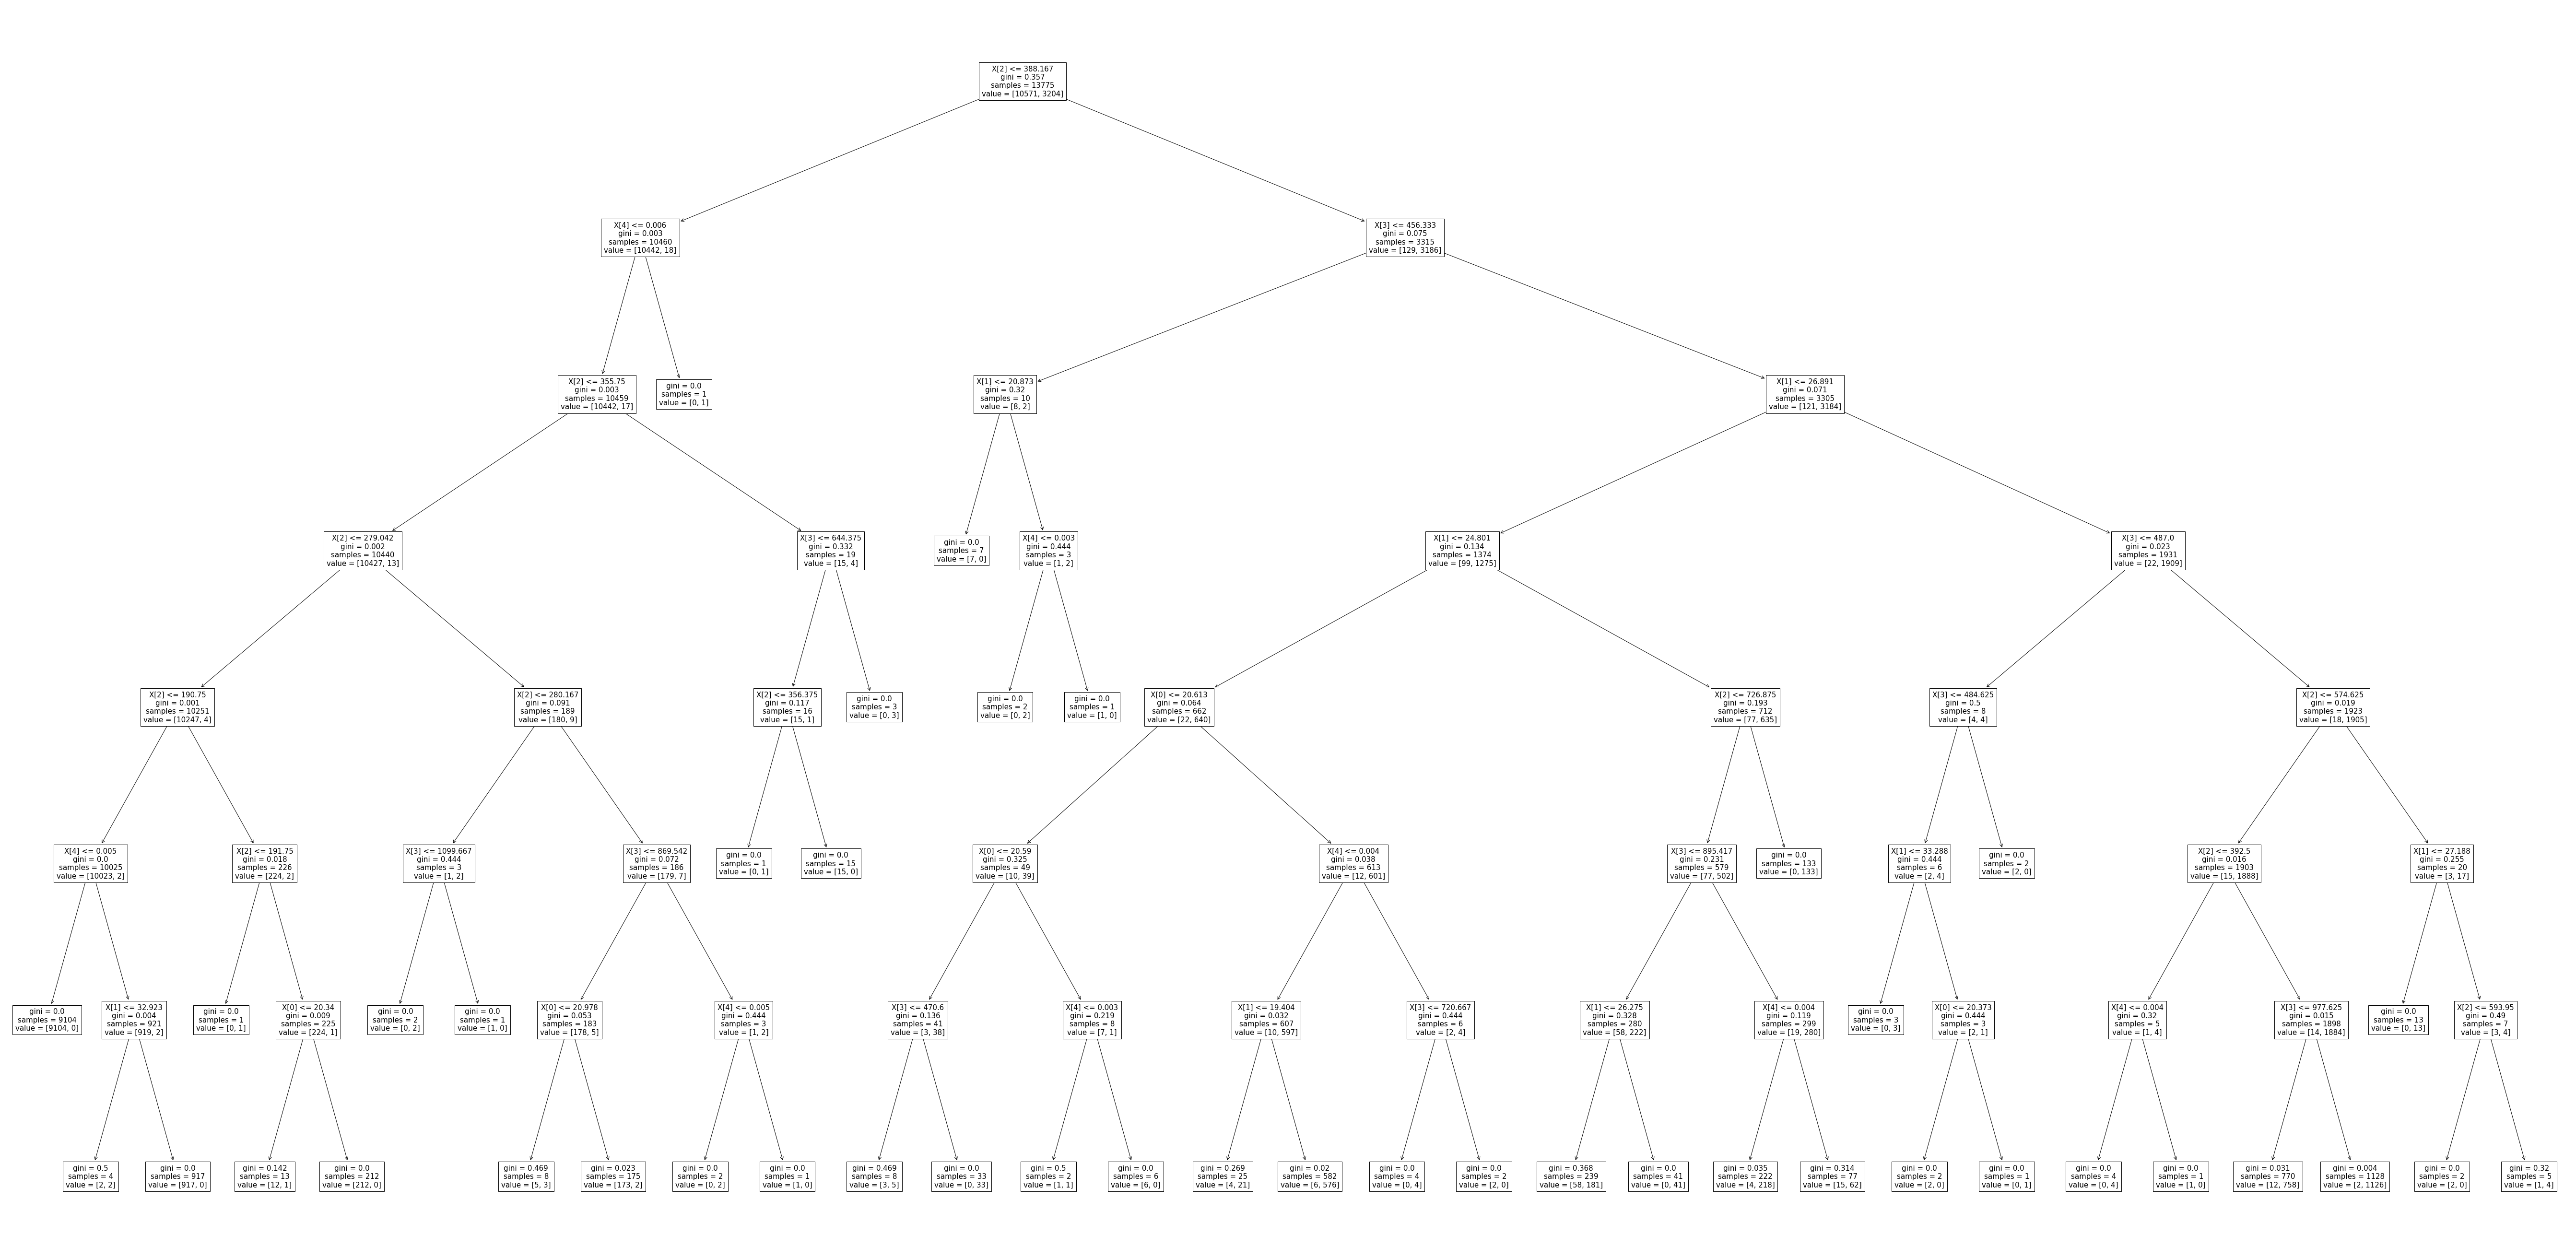

In [56]:
# plotting the splits
import matplotlib.pyplot as plt

plt.figure(figsize=(96,48))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [ ]:
# Save the figure for future reference
graph.render(filename='CART.dot',directory='/content/drive/MyDrive/CSI 382 - Datasets/')

# **Evaluating the Model - CART**

We often use a metric called confusion matrix for evaluating the accuracy of a model. 

##**Confusion Matrix**

A confusion matrix is basically a nxn matrix which indicates the number of instances a record has been classified as any of the n labels.

The desired outcome for a confusion is higher values on the left to right diagonal and 0 in the right to left diagonal.

##**Calculating a Confusion Matrix**

Below is the process for calculating a confusion Matrix.

1. You need a test dataset or a validation dataset with expected outcome values.
2. Make a prediction for each row in your test dataset.
3. From the expected outcomes and predictions count:
    * The number of correct predictions for each class.
    * The number of incorrect predictions for each class, organized by the class that was predicted.

In [66]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[5175   64]
 [  14 1532]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


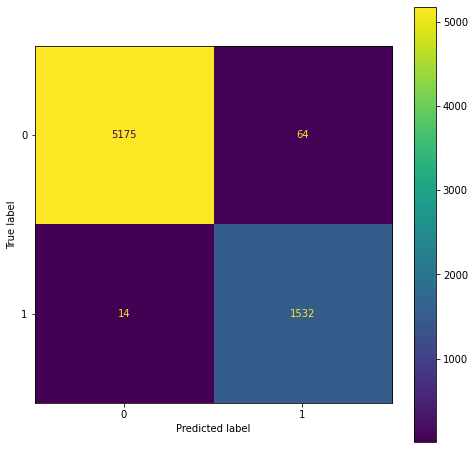

In [69]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

fig, ax = plt.subplots(figsize=(8, 8))

plot_confusion_matrix(clf_gini, X_test, y_test, values_format='.0f', ax=ax)  

plt.savefig('/content/drive/MyDrive/cart_confusion_matrix.png')

## **Support and Confidence**

The **support** of the decision rule refers to the proportion of records in the dataset that rest in that particular terminal leaf node.The **confidence** of the rule refers to the proportion of records in the leaf nodefor which the decision rule is true. 

In [70]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5239
           1       0.96      0.99      0.98      1546

    accuracy                           0.99      6785
   macro avg       0.98      0.99      0.98      6785
weighted avg       0.99      0.99      0.99      6785



# **Decision Tree - C4.5**

The C4.5 algorithm is Quinlan’s extension of his own ID3 algorithm for generating decision trees \cite{10.5555/152181}. Just as with CART, the C4.5 algorithm recursively visits each decision node, selecting the optimal split, until no further splits are possible. 


**The C4.5 algorithm uses the concept of information gain or entropy reduction to select the optimal split.**


The mean information requirement can then be calculated as the weighted sum of the entropies for the individual subsets, as follows:

$H_s(T) = \sum_{i=1}^{k}{P_{i}H_{s}(T_{i})}$

where $P_i$ represents the proportion of records in subset $i$ . We may then define our
information gain to be $gain(S) = H(T) - H_S(T)$

In [71]:
# setting maximum depth of the decision tree to be level 3 with randomly chosen samples in the training set
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [72]:
# Getting some predictions from the testing set
y_pred_en = clf_en.predict(X_test)

In [73]:
# Getting some predictions from the training set
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 0, 1, ..., 0, 1, 0])

In [74]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9896


In [75]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9896
Test set score: 0.9894


[Text(0.5, 0.875, 'X[2] <= 388.167\nentropy = 0.783\nsamples = 13775\nvalue = [10571, 3204]'),
 Text(0.25, 0.625, 'X[2] <= 190.75\nentropy = 0.018\nsamples = 10460\nvalue = [10442, 18]'),
 Text(0.125, 0.375, 'X[4] <= 0.005\nentropy = 0.003\nsamples = 10025\nvalue = [10023, 2]'),
 Text(0.0625, 0.125, 'entropy = 0.0\nsamples = 9104\nvalue = [9104, 0]'),
 Text(0.1875, 0.125, 'entropy = 0.022\nsamples = 921\nvalue = [919, 2]'),
 Text(0.375, 0.375, 'X[0] <= 22.404\nentropy = 0.227\nsamples = 435\nvalue = [419, 16]'),
 Text(0.3125, 0.125, 'entropy = 0.409\nsamples = 171\nvalue = [157, 14]'),
 Text(0.4375, 0.125, 'entropy = 0.064\nsamples = 264\nvalue = [262, 2]'),
 Text(0.75, 0.625, 'X[1] <= 26.891\nentropy = 0.237\nsamples = 3315\nvalue = [129, 3186]'),
 Text(0.625, 0.375, 'X[3] <= 470.575\nentropy = 0.393\nsamples = 1384\nvalue = [107, 1277]'),
 Text(0.5625, 0.125, 'entropy = 0.964\nsamples = 18\nvalue = [11, 7]'),
 Text(0.6875, 0.125, 'entropy = 0.367\nsamples = 1366\nvalue = [96, 1270]')

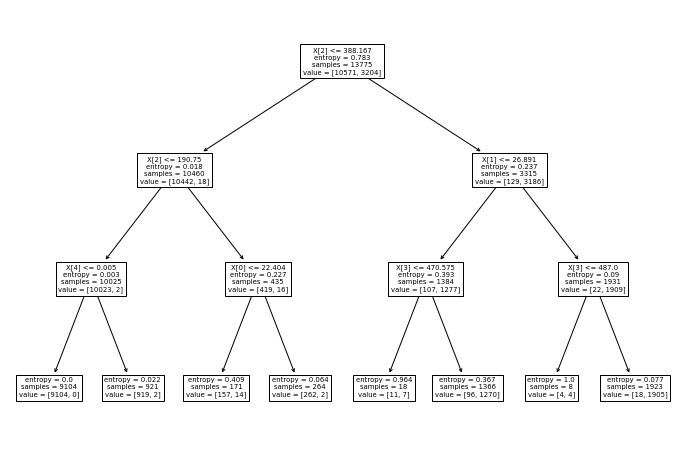

In [76]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [ ]:
# Save the figure for future reference
graph.render(filename='C4.5.dot',directory='/content/drive/MyDrive')

# **Evaluating the model - C4.5**

In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[5181   58]
 [  14 1532]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


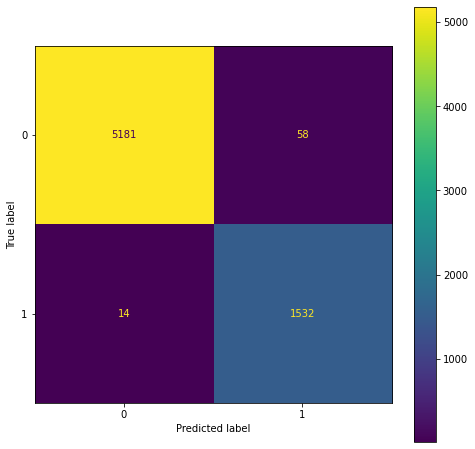

In [90]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

fig, ax = plt.subplots(figsize=(8, 8))

plot_confusion_matrix(clf_en, X_test, y_test, values_format='.0f', ax=ax)  

plt.savefig('/content/drive/MyDrive/c4.5_confusion_matrix.png')

In [91]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5239
           1       0.96      0.99      0.98      1546

    accuracy                           0.99      6785
   macro avg       0.98      0.99      0.99      6785
weighted avg       0.99      0.99      0.99      6785

